In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

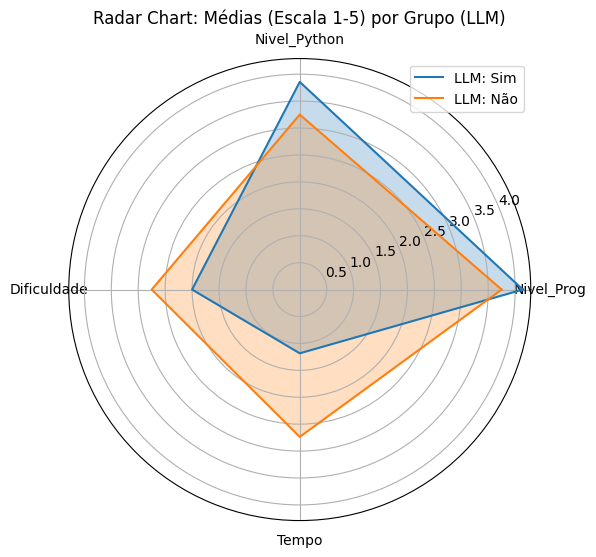

In [13]:
# Carregar os dados
df = pd.read_csv('Quest.csv', sep=';')

# Converter o tempo para minutos decimais
df['Tempo'] = pd.to_timedelta(df['Tempo']).dt.total_seconds() / 60

# Codificar 'LLM' (Sim=1, Não=0)
df['LLM_num'] = df['LLM'].map({'Sim': 1, 'Não': 0})

# Variáveis para comparar
vars_radar = ['Nivel_Prog', 'Nivel_Python', 'Dificuldade', 'Tempo']

# Calcular médias para cada grupo
mean_sim = df[df['LLM_num'] == 1][vars_radar].mean()
mean_nao = df[df['LLM_num'] == 0][vars_radar].mean()

# Normalizar todas para 1 a 5
mean_sim_scaled = mean_sim.copy()
mean_nao_scaled = mean_nao.copy()

# Níveis e Dificuldade já estão entre 1 e 5, mantemos como estão
for var in ['Nivel_Prog', 'Nivel_Python', 'Dificuldade']:
    mean_sim_scaled[var] = mean_sim[var]
    mean_nao_scaled[var] = mean_nao[var]

# Tempo: mapear para escala 1 (mínimo) a 5 (máximo)
tempo = df['Tempo'].min()
tempo_max = df['Tempo'].max()
for mean_scaled, mean in zip([mean_sim_scaled, mean_nao_scaled], [mean_sim, mean_nao]):
    mean_scaled['Tempo'] = 1 + (mean['Tempo'] - tempo) * (5 - 1) / (tempo_max - tempo)

# Radar setup
labels = vars_radar
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
mean_sim_list = mean_sim_scaled.tolist()
mean_nao_list = mean_nao_scaled.tolist()

# Fechar o círculo
mean_sim_list += mean_sim_list[:1]
mean_nao_list += mean_nao_list[:1]
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.plot(angles, mean_sim_list, label='LLM: Sim')
ax.fill(angles, mean_sim_list, alpha=0.25)

ax.plot(angles, mean_nao_list, label='LLM: Não')
ax.fill(angles, mean_nao_list, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_title('Radar Chart: Médias (Escala 1-5) por Grupo (LLM)')
ax.legend(loc='upper right')
plt.show()